In [2]:
import sys
sys.path.append('/Users/reketejmakrety/Documents/projects/multistate_dynamical_processes_networks')
import numpy as np
import matplotlib.pyplot as plt
from multistate_processes.barabasi_albert import BarabasiAlbert
from multistate_processes.process import MultistateProcess
from multistate_processes.simulate import SimulateProcess
from multistate_processes.meanField import mult
from itertools import product
from scipy.special import factorial

In [3]:
N = 100
n = 3
num_infected = 3
T = 50

network = BarabasiAlbert(N, 2)

rate_matrix = np.array([
    ['0', 'beta*{1}', '0'], 
    ['0', '0', 'gamma'], 
    ['0', '0', '0']
])

F = MultistateProcess(rate_matrix, gamma=0.02, beta=0.02)

states = [0] * N
infected_nodes = np.random.choice(list(range(N)), num_infected).tolist()

for i in infected_nodes[:-1]:
    states[i] = 1

states[infected_nodes[-1]] = 2

degree_distribution, bin_edges = network.degree_distribution()
X = np.zeros((T, n, int(network.k_max)))

degrees = network.degrees_list
for node in range(N):
    X[0][states[node]][degrees[node] - 1] += 1

In [23]:
X = np.nan_to_num(X / np.sum(X[0], axis=0))
for t in range(1, T):
    for k in range(1, network.k_max):
        X[t].T[k] = X[t - 1].T[k]
        all_ms = [list(h) for h in list(product(range(k + 2), repeat=n)) if sum(h) == k + 1]
        for m in all_ms:
            X[t].T[k] -= (F.R(m) -  F.F(m).T) * mult(X[t - 1], k + 1, m, network)*5 @ X[t - 1].T[k]

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


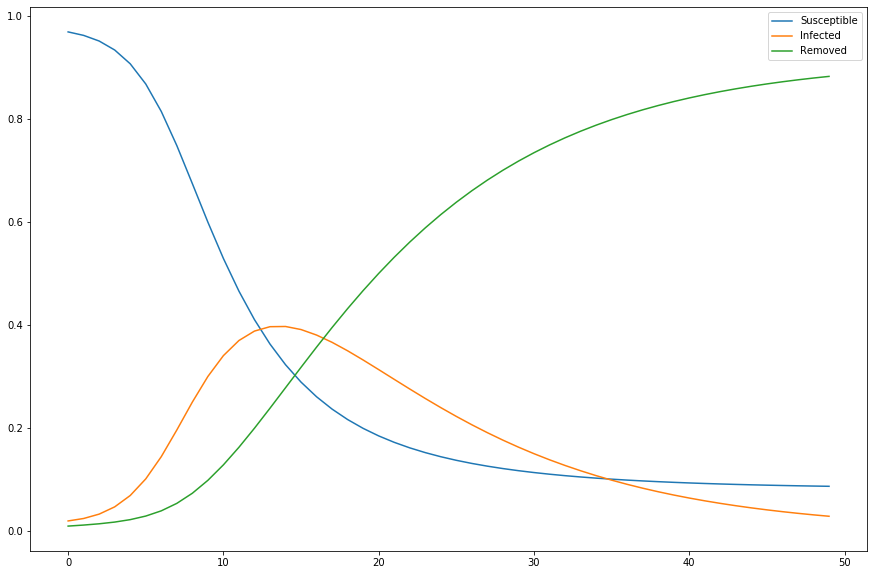

In [24]:
np.set_printoptions(suppress=True)
plt.figure(figsize=(15, 10))
plt.plot(np.arange(T), np.nan_to_num(X @ degree_distribution))
plt.legend(['Susceptible', 'Infected', 'Removed'])
plt.show()

In [69]:
(F.R(m) -  F.F(m).T)

array([[ 0.02,  0.  ,  0.  ],
       [-0.02,  0.2 ,  0.  ],
       [ 0.  , -0.2 ,  0.  ]])

In [9]:
X

array([[[ 0.00000000e+000,  1.00000000e+000,  1.00000000e+000,
          9.16666667e-001,  8.00000000e-001,  6.66666667e-001,
          1.00000000e+000,  1.00000000e+000,  1.00000000e+000,
          1.00000000e+000,  0.00000000e+000,  0.00000000e+000,
          1.00000000e+000,  1.00000000e+000,  0.00000000e+000,
          0.00000000e+000,  1.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
          8.33333333e-002,  0.00000000e+000,  3.33333333e-001,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
          0.00000000e+000,  0.00000000e+000],
        [ 0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
          0.00000000e+000,  2.00000000e-001,  0.00000000e+000,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
          0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
          0.00000000e+000,

In [78]:
- (F.R(m) -  F.F(m).T), mult(X, 4 + 1, t - 1, m, network)*100, X[t - 1].T[4]

(array([[-0.02, -0.  , -0.  ],
        [ 0.02, -0.2 , -0.  ],
        [-0.  ,  0.2 , -0.  ]]),
 3.930237305539143e-31,
 array([0.39334689, 0.55954528, 0.04710783]))

In [104]:
m = [2, 3, 0]
- (F.R(m) -  F.F(m).T) * mult(X, 5, 11, m, network) @ X[11].T[k]

array([-0.00009506,  0.00007208,  0.00002298])

In [14]:
from scipy.special import factorial

In [15]:
m = [2, 2, 1]
k = 5

In [16]:
m_factorial = factorial(m)
k_factorial = factorial(k)
k_factorial / m_factorial

array([ 60.,  60., 120.])

In [17]:
m_factorial

array([2., 2., 1.])

In [22]:
n = X[0].shape[0]

states = list(range(n))  # TODO: vectorize
get_omega = lambda j: omega(X[0], j, network)  # TODO: vectorize

omegas = map(get_omega, states)
m_factorial_product = np.cumprod(m_factorial)[-1]

omega_zip_m = zip(omegas, m)
omega_exponent_m = lambda z: z[0] ** z[1]  # TODO: vectorize

omega_product = np.cumprod(np.fromiter(map(omega_exponent_m, omega_zip_m), dtype=np.float64))[-1]

In [51]:
(k_factorial * omega_product) / m_factorial_product

6.848885868400858e-05

In [93]:
np.cumprod([0.9797985003478574, 0.0001030688757762375, 0.0])[-1]

0.0

In [96]:
0 ** 1

0

In [28]:
X[0]

array([[0.        , 0.95918367, 0.95652174, 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        ],
       [0.        , 0.02040816, 0.04347826, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
      

In [38]:
k_factorial / m_factorial_product * omega(X[0], 0, network)**2 * omega(X[0], 1, network)**2 * omega(X[0], 2, network)**1

6.848885868400858e-05

In [14]:
def omega(x_t):  # TODO: think about powerlaw, instead degree_distribution use alpha
    degree_distribution, bin_edges = network.degree_distribution()

    return (np.arange(1, network.k_max + 1) * degree_distribution) @ x_t[2] / network.mean_degree

omega(X[0]), X[0]

(0.24873096446700507,
 array([[ 0., 47., 22.,  7.,  6.,  2.,  4.,  1.,  2.,  2.,  0.,  0.,  0.,
          2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
        [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
          0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]]))

In [24]:
X = np.nan_to_num(X / np.sum(X[0], axis=0))
(np.arange(1, network.k_max + 1) * degree_distribution) @ X[0].T / network.mean_degree 

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.9822335 , 0.01269036, 0.00507614])

In [25]:
degree_distribution

array([0.  , 0.49, 0.23, 0.07, 0.06, 0.02, 0.04, 0.01, 0.02, 0.02, 0.  ,
       0.  , 0.  , 0.02, 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.01])

In [26]:
bin_edges

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36])

In [27]:
network.degrees_list

[36,
 14,
 14,
 7,
 3,
 5,
 10,
 19,
 7,
 2,
 4,
 4,
 3,
 2,
 9,
 5,
 5,
 6,
 3,
 9,
 3,
 3,
 10,
 7,
 3,
 7,
 3,
 4,
 4,
 8,
 2,
 2,
 2,
 5,
 3,
 2,
 6,
 5,
 3,
 4,
 4,
 3,
 3,
 3,
 2,
 3,
 5,
 3,
 3,
 2,
 3,
 3,
 2,
 2,
 2,
 3,
 2,
 3,
 2,
 3,
 2,
 2,
 4,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]